<a href="https://colab.research.google.com/github/Dipannita9991/Machine_Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#To load the dataset
data = pd.read_csv('tips.csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [72]:
#Data preprocessing
data.info()

#To check for null values
data.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


,total_bill
59,48.27
102,44.30
142,41.19
156,48.17
170,50.81
182,45.35
184,40.55
197,43.11
212,48.33


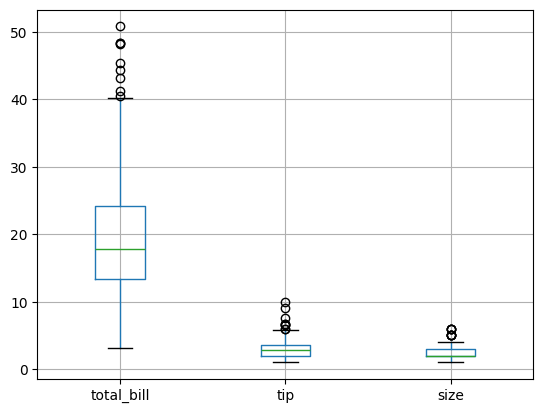

In [73]:
data.describe()

#plotting the outliers
data.boxplot()

#Function to identify the outliers in numerical columns
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

find_outliers_IQR(data['tip'])
find_outliers_IQR(data['total_bill'])

In [74]:
#To remove outliers
def remove_outliers(data):
  for column in data.select_dtypes(include='number').columns:
    outlier=pd.DataFrame()
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    outlier[column]=data[(data[column]<(q1-1.5*IQR)) | (data[column]>(q3+1.5*IQR))]=np.nan

  return outlier
remove_outliers(data)
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  222 non-null    float64
 1   tip         222 non-null    float64
 2   sex         222 non-null    object 
 3   smoker      222 non-null    object 
 4   day         222 non-null    object 
 5   time        222 non-null    object 
 6   size        222 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.9+ KB


In [75]:
#To drop duplicates
data.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [98]:
#Encoding data
data['sex'].replace(['Female','Male'], [0,1], inplace=True)
data['smoker'].replace(['Yes','No'], [0,1], inplace=True)
data['day'].unique()
label_encoder = preprocessing.LabelEncoder()
data['day']= label_encoder.fit_transform(data['day'])

<ipython-input-98-5b3bbdc757c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day']= label_encoder.fit_transform(data['day'])


In [99]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,1,2,Dinner,2.0
1,10.34,1.66,1,1,2,Dinner,3.0
2,21.01,3.50,1,1,2,Dinner,3.0
3,23.68,3.31,1,1,2,Dinner,2.0
4,24.59,3.61,0,1,2,Dinner,4.0
...,...,...,...,...,...,...,...
238,35.83,4.67,0,1,1,Dinner,3.0
240,27.18,2.00,0,0,1,Dinner,2.0
241,22.67,2.00,1,0,1,Dinner,2.0
242,17.82,1.75,1,1,1,Dinner,2.0


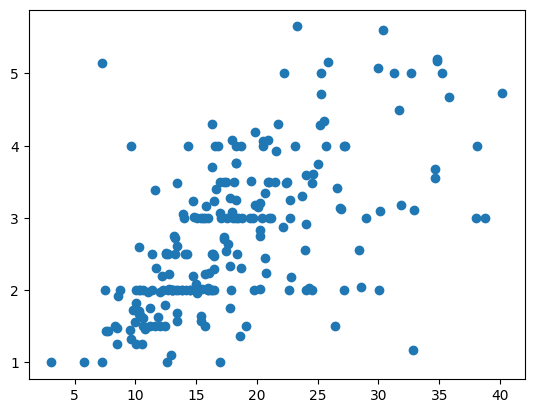

In [100]:
#Bivariate analysis

##Scatter plot
x=data['total_bill']
y=data['tip']
plt.scatter(x,y)

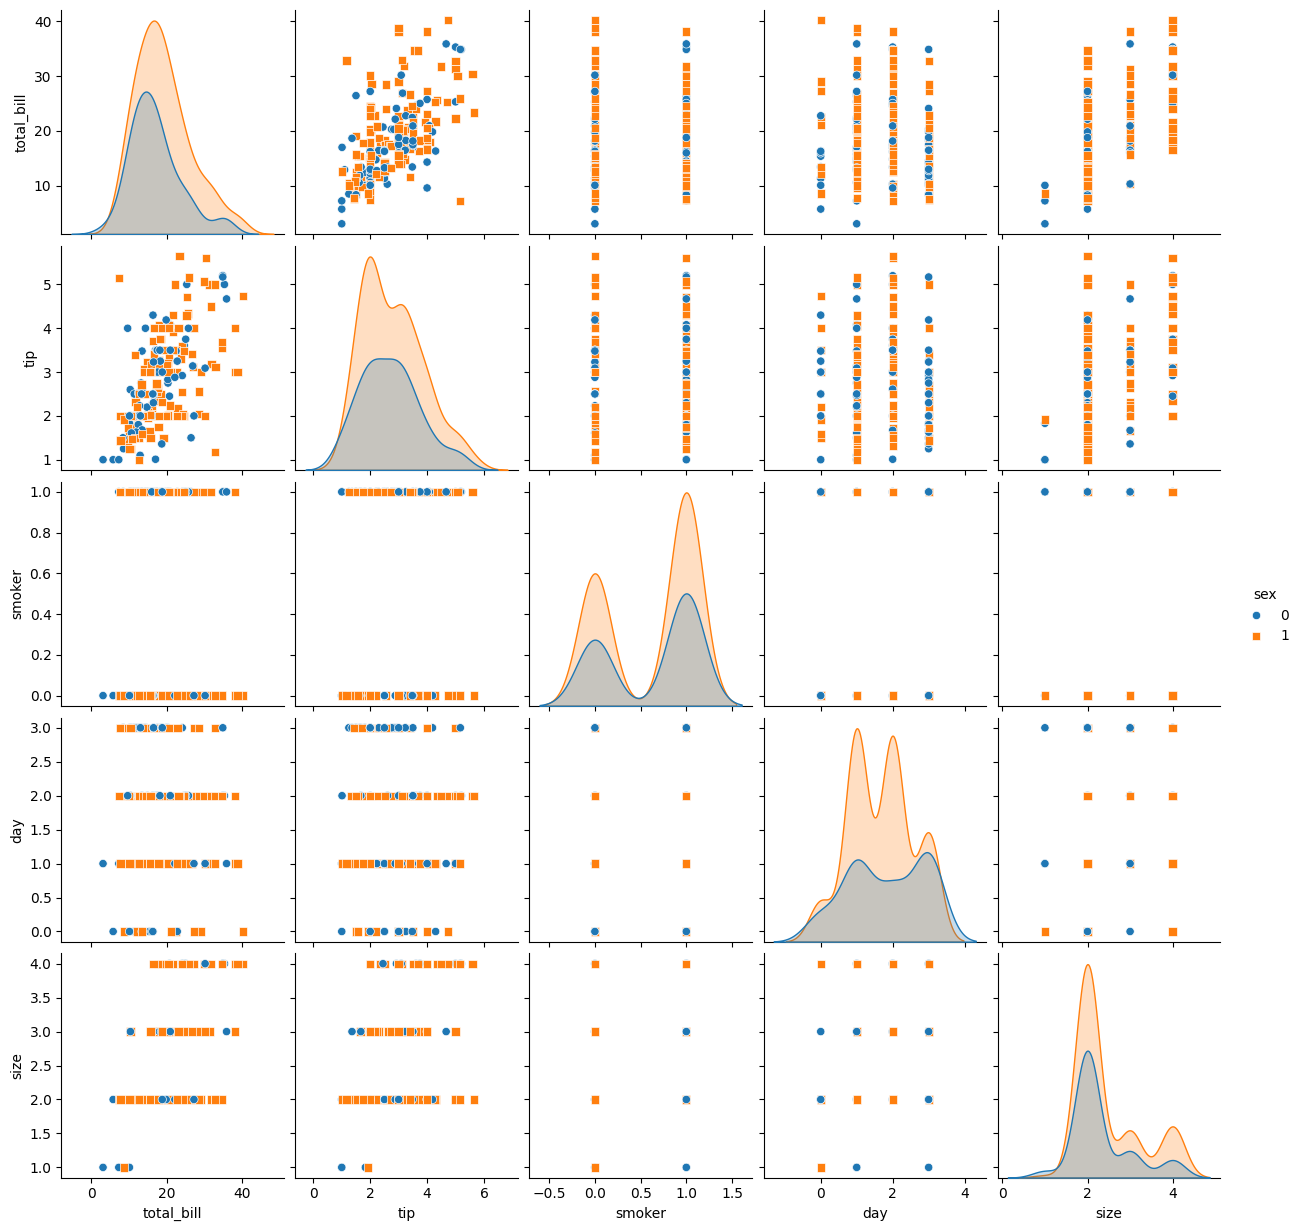

In [101]:
#Pairplot analysis
sns.pairplot(data, hue = 'sex', markers=['o', 's'])

From the above plot we can conclude that size has no observable correlation with tip. Hence, we can remove the column. And sex and total bill appears to be correlated with tip.

In [105]:
#Removing column
mod_data = data.drop(columns=['size'], axis=1)
mod_data

,total_bill,tip,sex,smoker,day
0,16.99,1.01,0,1,2
1,10.34,1.66,1,1,2
2,21.01,3.50,1,1,2
3,23.68,3.31,1,1,2
4,24.59,3.61,0,1,2
...,...,...,...,...,...
238,35.83,4.67,0,1,1
240,27.18,2.00,0,0,1
241,22.67,2.00,1,0,1
242,17.82,1.75,1,1,1


Correlation matrix:             total_bill       tip       sex    smoker       day
total_bill    1.000000  0.603705  0.138866 -0.088054 -0.072633
tip           0.603705  1.000000  0.047549 -0.054090 -0.021820
sex           0.138866  0.047549  1.000000 -0.012515 -0.072594
smoker       -0.088054 -0.054090 -0.012515  1.000000  0.287152
day          -0.072633 -0.021820 -0.072594  0.287152  1.000000


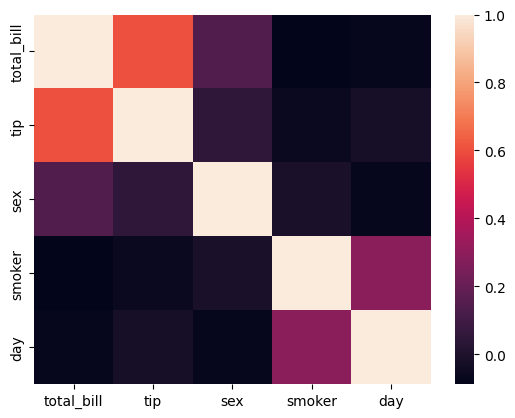

In [107]:
#Correlation matrix
sns.heatmap(mod_data.corr(numeric_only=True))
matrix = mod_data.corr(numeric_only=True)
print("Correlation matrix:", matrix)

<Axes: xlabel='total_bill', ylabel='tip'>

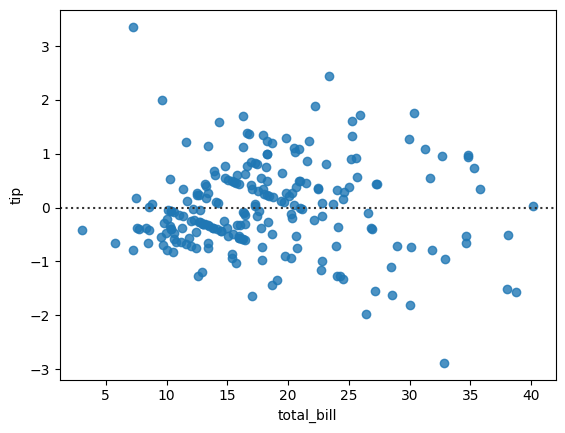

In [130]:
#Residual plot
sns.residplot(x='total_bill', y='tip', data=data)

In [111]:
#Preprocessing data for regression
df=mod_data.select_dtypes(include=['int','float'])

y=df['tip']
X=df.drop(columns='tip', axis =1)

#Scale the data
scaler = StandardScaler()

#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization
X_scaled_train=scaler.fit_transform(X_train[X_train.columns])
X_scaled_test=scaler.transform(X_test[X_test.columns])

In [129]:
#Linear Regression model

linear=LinearRegression()
model1=linear.fit(X_scaled_train, y_train) # Fitting to the model
y_pred_lin=linear.predict(X_scaled_test) # Prediction
print('R2 and MSE of Linear Regression:', r2_score(y_test, y_pred_lin), mean_squared_error (y_test, y_pred_lin))

R2 and MSE of Linear Regression: 0.37358976154024526 0.659440407981219


In [137]:
#Ridge Regression

ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_scaled_train, y_train)
y_pred_rd=ridge_reg.predict(X_scaled_test)
print('Ridge Regression R2 and MSE', r2_score(y_test, y_pred_rd), mean_squared_error (y_test, y_pred_rd))

Ridge Regression R2 and MSE 0.3735779756645876 0.6594528153177772


In [139]:
#Lasso Regression

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_scaled_train, y_train)
y_pred_lasso=lasso_reg.predict(X_scaled_test)
print('Lasso Regression R2 and MSE', r2_score(y_test, y_pred_lasso), mean_squared_error (y_test, y_pred_lasso))

Lasso Regression R2 and MSE 0.37855910417660144 0.6542090354168515


In [170]:
#Decision Regression

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_scaled_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_scaled_test)

# Evaluation
print('Decision Tree R2 and MSE:', r2_score(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_tree))

Decision Tree R2 and MSE: 0.04358341019316958 1.0068477611940299


In [146]:
# Random forest

forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_scaled_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_scaled_test)

# Evaluation
print('Random Forest R2 and MSE:', r2_score(y_test, y_pred_forest), mean_squared_error(y_test, y_pred_forest))

Random Forest R2 and MSE: 0.41289428441295206 0.6180633853731344


In [155]:
#Support Vector Regression

y_scaled_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()#Scaling y_training data before model training

svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_scaled_train, y_scaled_train)

# Predictions
y_pred_svr = svr_reg.predict(X_scaled_test)
y_pred_svr = scaler.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2 and MSE:', r2_score(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_svr))

SVR R2 and MSE: 0.4029322143612457 0.6285507483437458


In [156]:
#KNN

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_scaled_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_scaled_test)

# Evaluation
print('KNN Regression R2 and MSE:', r2_score(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_knn))

KNN Regression R2 and MSE: 0.22459066714704667 0.8162961194029852


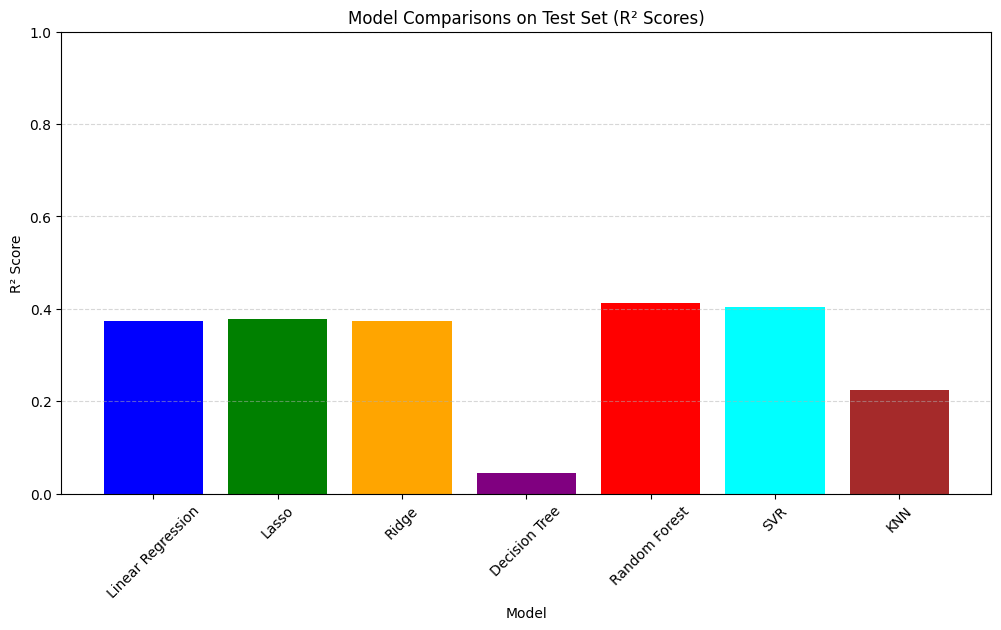

In [163]:
#Comparison test between the models

# Dictionary of model names and their respective R² scores on the test set
model_performance = {
    'Linear Regression': r2_score(y_test, y_pred_lin),
    'Lasso': r2_score(y_test, y_pred_lasso),
    'Ridge': r2_score(y_test, y_pred_rd),
    'Decision Tree': r2_score(y_test, y_pred_tree),
    'Random Forest': r2_score(y_test, y_pred_forest),
    'SVR': r2_score(y_test, y_pred_svr),
    'KNN': r2_score(y_test, y_pred_knn)
}

# Plotting the R² scores
plt.figure(figsize=(12, 6))
plt.bar(model_performance.keys(), model_performance.values(), color=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'brown'])
plt.title('Model Comparisons on Test Set (R² Scores)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Adjust based on the expected range of R² scores
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

R² score or coefficient of determination measures the model's prediction outcome. Decision tree performs the poorest, probably due to model overfitting. Random Forest and SVR shows better performabce suggesting that it is able to capture the pattern and variance in the data with comparatively higher accuracy.

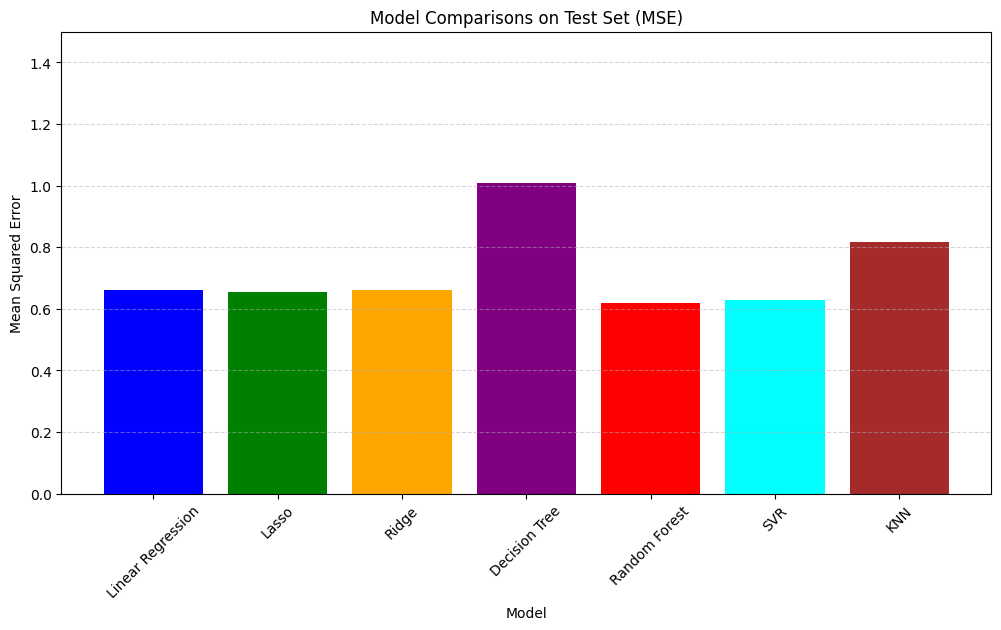

In [171]:
#Comparison test between the models

model_performance = {
    'Linear Regression': mean_squared_error(y_test, y_pred_lin),
    'Lasso': mean_squared_error(y_test, y_pred_lasso),
    'Ridge': mean_squared_error(y_test, y_pred_rd),
    'Decision Tree': mean_squared_error(y_test, y_pred_tree),
    'Random Forest': mean_squared_error(y_test, y_pred_forest),
    'SVR': mean_squared_error(y_test, y_pred_svr),
    'KNN': mean_squared_error(y_test, y_pred_knn)
}

# Plotting the R² scores
plt.figure(figsize=(12, 6))
plt.bar(model_performance.keys(), model_performance.values(), color=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'brown'])
plt.title('Model Comparisons on Test Set (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.ylim(0, 1.5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

MSE is used to evaluate the accuracy of a regression model by calculating the average of the mean square difference between the actual and predicted value. From the comparative plot we can conclude that decision tree performs the poorest among all models. Random Forest and SVR performs better than other models for the current dataset.

CONCLUSION:

1. Total bill is significantly correlated with the tip amount as observed from the correlation matrix with correlation coeffecient = 0.6.

2. SVR and RF are the best performing models as per the analysis.

3. Data analysis shows no correlation between the other attributes such as sex, weekday, timing, or smoking habits of the customers. Model trained on large historical data can further improve the prediction of the tip amount.

a) Further insignts on the service experience of the genders, specifically based on their habits, like accounting for the security of the women, providing relationship-oriented service, lounge preference of smokers and fast and efficient service during work hours. These data can further help in improving the model performance and prediction capability.

b)Weekends and holidays must lead to peak revenue periods. Pricing adjustments, special discounts and more appealing services can increase the revenue in this period.

